In [1]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# df = pd.read_csv('18_18/40_123.csv', sep=';', skiprows=[0], names=['block', 'bee_hive', 'loaf', 'boat', 'tub', 'blinker', 'toad', 'beacon', 'pulsar', 'glider', 'heat', 'occupancy'], header=None)
# df

In [3]:
# # type(df['blinker'][34])
# df['blinker'][0]

In [4]:
# for col in df.columns:
#     df[col] = df[col].apply(lambda x: ast.literal_eval(str(x)))

In [5]:
# plt.plot(df.index, df['occupancy'], label='data')
# plt.xlabel('Time')
# plt.ylabel('Occupancy')
# plt.legend()
# plt.show()

In [6]:
folder_name = 'data/'
all_dim = [[i, i] for i in [15, 18]] # ToDo
all_seed = [123, 124] # ToDo
all_native = [40, 50] # ToDo

columns = ['block', 'bee_hive', 'loaf', 'boat', 'tub', 'blinker', 'toad', 'beacon', 'pulsar', 'glider', 'heat', 'occupancy']
df = pd.DataFrame(columns=columns)
for dim in all_dim:
    for native in all_native:
        for seed in all_seed:
            file_name = folder_name+str(dim[0])+"_"+str(dim[1])+"/"+str(native)+"_"+str(seed)+'.csv'
            df_tmp = pd.read_csv(file_name, sep=';', skiprows=[0], names=columns, header=None)
            for col in df_tmp.columns:
                df_tmp[col] = df_tmp[col].apply(lambda x: ast.literal_eval(str(x)))
            df = df.append(df_tmp, ignore_index=True)
df

,block,bee_hive,loaf,boat,tub,blinker,toad,beacon,pulsar,glider,heat,occupancy
0,0,0,0,0,0,"[[0, 1, 10, 13]]",0,0,0,0,0,76
1,0,0,0,0,0,0,0,0,0,0,81,91
2,0,0,0,0,0,0,0,0,0,0,79,72
3,0,0,0,0,0,0,0,0,0,0,77,75
4,0,0,0,0,0,0,0,0,0,0,77,64
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,"[[0, 0, 11, 7], [0, 1, 6, 12], [0, 1, 15, 12]]",0,0,0,0,0,0,0,0,0,24
796,0,"[[0, 0, 11, 7], [0, 1, 6, 12], [0, 1, 15, 12]]",0,0,0,0,0,0,0,0,0,24
797,0,"[[0, 0, 11, 7], [0, 1, 6, 12], [0, 1, 15, 12]]",0,0,0,0,0,0,0,0,0,24
798,0,"[[0, 0, 11, 7], [0, 1, 6, 12], [0, 1, 15, 12]]",0,0,0,0,0,0,0,0,0,24


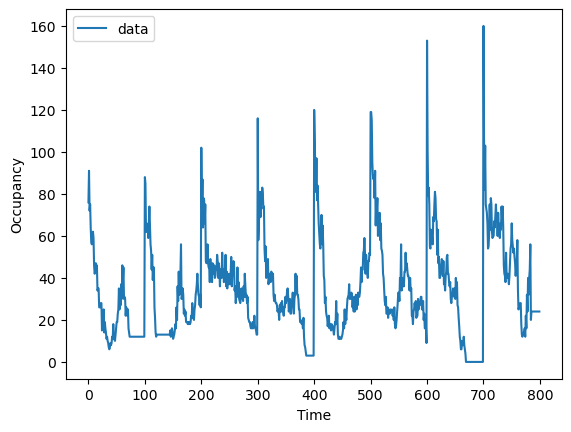

In [8]:
plt.plot(df.index, df['occupancy'], label='data')
plt.xlabel('Time')
plt.ylabel('Occupancy')
plt.legend()
plt.show()

In [41]:
iterations = 100

In [71]:
df = pd.DataFrame(columns=columns)
dim = all_dim[0]
# for native in all_native:
for seed in all_seed:
    file_name = folder_name+str(dim[0])+"_"+str(dim[1])+"/"+str(native)+"_"+str(seed)+'.csv'
    df_tmp = pd.read_csv(file_name, sep=';', skiprows=[0], names=columns, header=None)
    for col in df_tmp.columns:
        df_tmp[col] = df_tmp[col].apply(lambda x: ast.literal_eval(str(x)))
    df = df.append(df_tmp, ignore_index=True)

df

,block,bee_hive,loaf,boat,tub,blinker,toad,beacon,pulsar,glider,heat,occupancy
0,0,0,0,0,0,0,0,0,0,0,0,102
1,0,0,0,0,0,0,0,0,0,0,79,73
2,0,0,0,0,0,0,0,0,0,0,82,87
3,0,0,0,0,0,0,0,0,0,0,87,64
4,0,0,0,0,0,"[[0, 1, 7, 4]]",0,0,0,0,56,78
...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,0,0,0,"[[0, 0, 11, 1]]",0,0,0,0,4,3
196,0,0,0,0,0,"[[0, 1, 11, 1]]",0,0,0,0,4,3
197,0,0,0,0,0,"[[0, 0, 11, 1]]",0,0,0,0,4,3
198,0,0,0,0,0,"[[0, 1, 11, 1]]",0,0,0,0,4,3


In [72]:
df.shape[0]

200

In [87]:
df_per_native = df[['heat', 'occupancy']]
df_res = df_per_native.groupby(by=[(lambda x: df_per_native.loc[x:df.shape[0]:iterations])(x) for x in list(range(iterations))]).mean()
df_res

ValueError: Grouper for '<class 'pandas.core.frame.DataFrame'>' not 1-dimensional

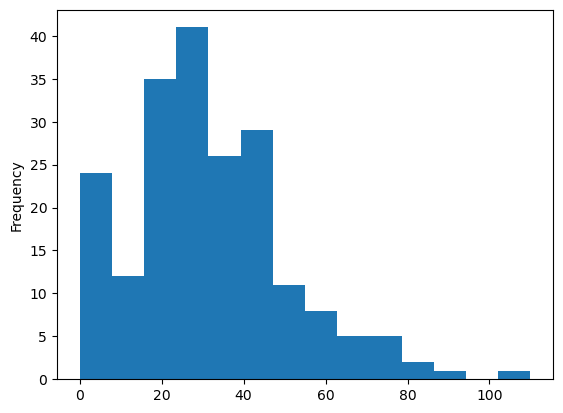

In [116]:
df_per_native['heat'].plot.hist(bins=int(np.sqrt(df_per_native.shape[0])))
plt.show()

In [95]:
y = list(range(iterations))

df_res = pd.DataFrame([((lambda x: df_per_native.loc[x:df.shape[0]:iterations])(x)).mean() for x in y])
df_res

,heat,occupancy
0,0.0,109.0
1,94.5,65.5
2,71.0,76.5
3,72.5,68.0
4,63.5,79.5
...,...,...
95,5.5,10.0
96,5.5,9.5
97,3.5,9.0
98,3.0,8.0


In [80]:
y = list(range(iterations))
res = [(lambda x: df_per_native.loc[x:df.shape[0]:iterations])(x) for x in y]
res

[heat           0.0
 occupancy    109.0
 dtype: float64,
 heat         94.5
 occupancy    65.5
 dtype: float64,
 heat         71.0
 occupancy    76.5
 dtype: float64,
 heat         72.5
 occupancy    68.0
 dtype: float64,
 heat         63.5
 occupancy    79.5
 dtype: float64,
 heat         74.5
 occupancy    73.0
 dtype: float64,
 heat         68.0
 occupancy    72.0
 dtype: float64,
 heat         63.0
 occupancy    75.0
 dtype: float64,
 heat         61.5
 occupancy    65.5
 dtype: float64,
 heat         57.0
 occupancy    63.5
 dtype: float64,
 heat         59.5
 occupancy    61.0
 dtype: float64,
 heat         59.0
 occupancy    65.0
 dtype: float64,
 heat         62.5
 occupancy    50.5
 dtype: float64,
 heat         51.0
 occupancy    46.5
 dtype: float64,
 heat         47.5
 occupancy    50.0
 dtype: float64,
 heat         43.0
 occupancy    39.0
 dtype: float64,
 heat         38.5
 occupancy    48.5
 dtype: float64,
 heat         48.0
 occupancy    43.5
 dtype: float64,
 heat   

In [68]:
x = 0
df_per_native.loc[x:x+1:iterations]

,heat,occupancy
0,0,102


In [70]:
x = 0
res = (lambda x: df_per_native.loc[list(range(x, df.shape[0], iterations))])(list(range(iterations)))
res

TypeError: 'list' object cannot be interpreted as an integer

In [ ]:
n = len(all_native)
for i in range(n):
    df_per_native = df[['heat', 'occupancy']][i*iterations*n:(i+1)*iterations*n]
    # df_per_native['time'] = list(range(iterations))*n
    df_res = (df_per_native.groupby(as_index=True)).mean()

    plt.title(f"dim = {dim}, native = {all_native[i]}")
    plt.plot(list(range(iterations)), df_res['occupancy'], label=f'mean occupancy')
    plt.xlabel('Time')
    plt.ylabel('Occupancy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

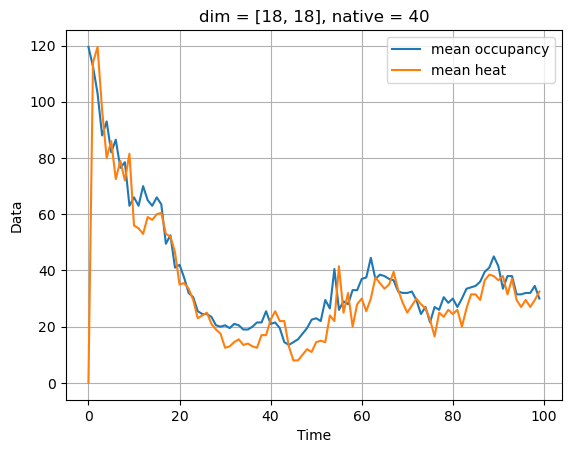

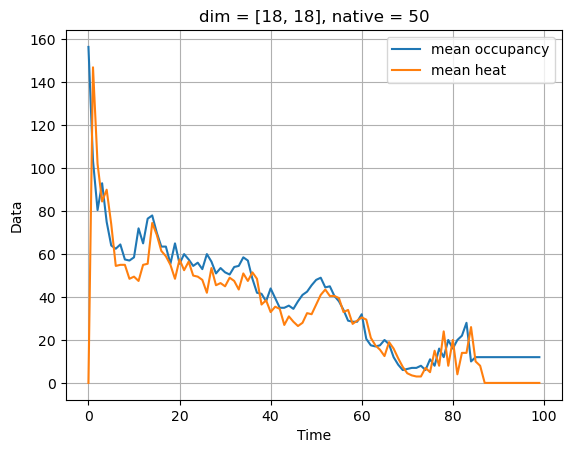

In [52]:
df = pd.DataFrame(columns=columns)
dim = all_dim[1]
for native in all_native:
    for seed in all_seed:
        file_name = folder_name+str(dim[0])+"_"+str(dim[1])+"/"+str(native)+"_"+str(seed)+'.csv'
        df_tmp = pd.read_csv(file_name, sep=';', skiprows=[0], names=columns, header=None)
        for col in df_tmp.columns:
            df_tmp[col] = df_tmp[col].apply(lambda x: ast.literal_eval(str(x)))
        df = df.append(df_tmp, ignore_index=True)

n = len(all_native)
for i in range(n):
    df_per_native = df[['heat', 'occupancy']][i*iterations*n:(i+1)*iterations*n]
    df_per_native['time'] = list(range(iterations))*n
    df_res = (df_per_native.groupby('time')).mean()
    plt.title(f"dim = {dim}, native = {all_native[i]}")
    plt.plot(list(range(iterations)), df_res['occupancy'], label=f'mean occupancy')
    plt.plot(list(range(iterations)), df_res['heat'], label=f'mean heat')
    plt.xlabel('Time')
    plt.ylabel('Data')
    plt.legend(loc='best')
    plt.grid()
    plt.show()